In [1]:
using CSV
using DataFrames
using Plots
using Statistics
using LaTeXStrings

### Auswertungsteil 2: IR-Absorption und -Emission von verschiedenen Materialien

In [2]:
alu = CSV.read("IR-Transmission/Alufolie.csv", DataFrame)
orangeneFolie = CSV.read("IR-Transmission/Orangene_Folie.csv", DataFrame)
taschentuch = CSV.read("IR-Transmission/Papiertaschentuch_1_Lage_doppelt.csv", DataFrame)
peFolie = CSV.read("IR-Transmission/PE-Folie.csv", DataFrame)
schreibpapier = CSV.read("IR-Transmission/Schreibpapier.csv", DataFrame)
violetteFolie = CSV.read("IR-Transmission/Violett-Blaue_Folie.csv", DataFrame);

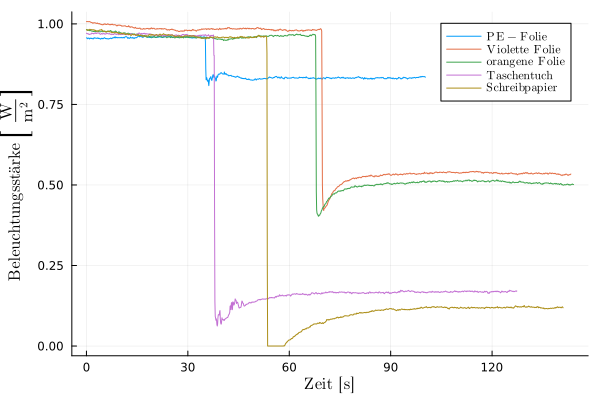

In [3]:
materialien = plot(peFolie.seconds, peFolie.beleuchtungsstaerke, label=L"\mathrm{PE-Folie}")
plot!(violetteFolie.seconds, violetteFolie.beleuchtungsstaerke, label=L"\mathrm{Violette \enspace Folie}")
plot!(orangeneFolie.seconds, orangeneFolie.beleuchtungsstaerke, label=L"\mathrm{orangene \enspace Folie}")
plot!(taschentuch.seconds, taschentuch.beleuchtungsstaerke, label=L"\mathrm{Taschentuch}")
plot!(schreibpapier.seconds, schreibpapier.beleuchtungsstaerke, label=L"\mathrm{Schreibpapier}")
#plot!(alu.seconds, alu.beleuchtungsstaerke, label=L"\mathrm{Aluminium}")
xlabel!(L"\mathrm{Zeit} \enspace [\mathrm{s}]")
ylabel!(L"\mathrm{Beleuchtungsstärke} \enspace \left[\mathrm{\frac{W}{m^2}}\right]")

In [4]:
savefig(materialien, "../../media/B1.1/materialien.pdf");

Mittelwert + Fehler Funktion:

In [5]:
function mittelwert(a)
    # Hilfsvariablen:
    n = length(a)
    
    # Mittelwert:
    mittel = 0
    for i in 1:n
        mittel += a[i]
    end
    mittel = mittel/n
    
    # Standardabweichung des Mittewerts:
    err = 0
    for i in 1:n
        err += (a[i] - mittel)^2
    end
    err = sqrt( (1 / (n * (n-1)) ) *  err)
    
    return mittel, err
end

mittelwert (generic function with 1 method)

In [6]:
I_min_all = [minimum(peFolie[:, :beleuchtungsstaerke]),minimum(violetteFolie[:, :beleuchtungsstaerke]),minimum(orangeneFolie[:, :beleuchtungsstaerke]),minimum(taschentuch[:, :beleuchtungsstaerke]), minimum(schreibpapier[:, :beleuchtungsstaerke])]
I_min_error_all = [0.000005, 0.000005, 0.000005, 0.000005, 0.000005]
I_mean_all = [mittelwert(peFolie[601:end, :beleuchtungsstaerke])[1], mittelwert(violetteFolie[901:end, :beleuchtungsstaerke])[1], mittelwert(orangeneFolie[901:end, :beleuchtungsstaerke])[1], mittelwert(taschentuch[751:end, :beleuchtungsstaerke])[1], mittelwert(schreibpapier[901:end, :beleuchtungsstaerke])[1]]
I_mean_error_all = [mittelwert(peFolie[601:end, :beleuchtungsstaerke])[2], mittelwert(violetteFolie[901:end, :beleuchtungsstaerke])[2], mittelwert(orangeneFolie[901:end, :beleuchtungsstaerke])[2], mittelwert(taschentuch[751:end, :beleuchtungsstaerke])[2], mittelwert(schreibpapier[901:end, :beleuchtungsstaerke])[2]]
I_0_all = [mittelwert(peFolie[1:301, :beleuchtungsstaerke])[1], mittelwert(violetteFolie[301:601, :beleuchtungsstaerke])[1], mittelwert(orangeneFolie[301:601, :beleuchtungsstaerke])[1], mittelwert(taschentuch[1:301, :beleuchtungsstaerke])[1], mittelwert(schreibpapier[201:501, :beleuchtungsstaerke])[1]]
I_0_error_all = [mittelwert(peFolie[1:301, :beleuchtungsstaerke])[2], mittelwert(violetteFolie[301:601, :beleuchtungsstaerke])[2], mittelwert(orangeneFolie[301:601, :beleuchtungsstaerke])[2], mittelwert(taschentuch[1:301, :beleuchtungsstaerke])[2], mittelwert(schreibpapier[201:501, :beleuchtungsstaerke])[2]]
T_mean_all = [I_mean_all[1]/I_0_all[1], I_mean_all[2]/I_0_all[2], I_mean_all[3]/I_0_all[3], I_mean_all[4]/I_0_all[4], I_mean_all[5]/I_0_all[5]]
T_min_all = [I_min_all[1]/I_0_all[1], I_min_all[2]/I_0_all[2], I_min_all[3]/I_0_all[3], I_min_all[4]/I_0_all[4], I_min_all[5]/I_0_all[5]]

# Fehler per Gaußscher Fehlerfortpflanzung:
T_mean_error(i) = sqrt( (I_mean_error_all[i] / I_0_all[i])^2 + (I_mean_all[i] * I_0_error_all[i] / I_0_all[i]^2)^2 )
T_min_error(i) = sqrt( (I_min_error_all[i] / I_0_all[i])^2 + (I_min_all[i] * I_0_error_all[i] / I_0_all[i]^2)^2 )

T_mean_error_all = [T_mean_error(1), T_mean_error(2), T_mean_error(3), T_mean_error(4), T_mean_error(5)]
T_min_error_all = [T_min_error(1), T_min_error(2), T_min_error(3), T_min_error(4), T_min_error(5)]
;

In [7]:
df = DataFrame(
    Material=["PE", "Violett", "Orange", "Taschentuch", "Schreibpapier"],
    I_min = I_min_all,
    I_mean = I_mean_all,
    I_mean_error = I_mean_error_all,
    I_0 = I_0_all,
    I_0_error = I_0_error_all,
    T_mean = T_mean_all,
    T_mean_err = T_mean_error_all,
    T_min = T_min_all,
    T_min_err = T_min_error_all
    )
show(df, allcols = true)

5×10 DataFrame
 Row │ Material       I_min    I_mean    I_mean_error  I_0       I_0_error    T_mean    T_mean_err   T_min      T_min_err   
     │ String         Float64  Float64   Float64       Float64   Float64      Float64   Float64      Float64    Float64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ PE             0.80835  0.832129   8.52815e-5   0.957965  0.000138624  0.868643  0.00015403   0.84382    0.000122218
   2 │ Violett        0.42075  0.53625    0.00011692   0.983375  0.000143505  0.545316  0.00014307   0.427863   6.26452e-5
   3 │ Orange         0.4029   0.508392   0.000166094  0.958185  0.000233947  0.530578  0.000216401  0.420482   0.000102796
   4 │ Taschentuch    0.06222  0.167711   9.25885e-5   0.967341  0.00013491   0.173373  9.87213e-5   0.0643206  1.03531e-5
   5 │ Schreibpapier  0.0      0.118639   0.000121608  0.960271  0.000197376  0.123548  0.000129161  0.0        5.20

### Auswertungsteil 3: IR-Absorption in $CO_2$ bei bekannter Konzentration

In [8]:
ml1 = CSV.read("Konzentrationskalibrierung/1ml.csv", DataFrame)
ml2 = CSV.read("Konzentrationskalibrierung/2ml.csv", DataFrame)
ml3 = CSV.read("Konzentrationskalibrierung/3ml.csv", DataFrame)
ml4 = CSV.read("Konzentrationskalibrierung/4ml.csv", DataFrame)
ml5 = CSV.read("Konzentrationskalibrierung/5ml.csv", DataFrame)
ml10 = CSV.read("Konzentrationskalibrierung/10ml.csv", DataFrame)
ml15 = CSV.read("Konzentrationskalibrierung/15ml.csv", DataFrame)
ml20 = CSV.read("Konzentrationskalibrierung/20ml.csv", DataFrame)
ml30 = CSV.read("Konzentrationskalibrierung/30ml.csv", DataFrame)
ml45 = CSV.read("Konzentrationskalibrierung/45ml.csv", DataFrame)
ml60 = CSV.read("Konzentrationskalibrierung/60ml.csv", DataFrame)
mlsaettigung = CSV.read("Konzentrationskalibrierung/Saettigung_CO2.csv", DataFrame)
;

In [9]:
#plot(ml1.seconds, ml1.beleuchtungsstaerke, label=L"1 \, ml")
# plot(ml1SecondsCut.*0.5, ml1.beleuchtungsstaerke[1301:end], label = L"1 \, ml \enspace (zeitlich \enspace gestaucht)")
# plot!(ml2.seconds, ml2.beleuchtungsstaerke, legend=:bottomright, label=L"2 \, ml")
# plot!(ml3.seconds, ml3.beleuchtungsstaerke, label=L"3 \, ml")
# plot!(ml4.seconds, ml4.beleuchtungsstaerke, label=L"4 \, ml")
# plot!(ml5.seconds, ml5.beleuchtungsstaerke, label=L"5 \, ml")
# plot!(ml10.seconds, ml10.beleuchtungsstaerke, label=L"10 \, ml")
# plot!(ml15.seconds, ml15.beleuchtungsstaerke, label=L"15 \, ml")
# plot!(ml20.seconds, ml20.beleuchtungsstaerke, label=L"20 \, ml")
# plot!(ml30.seconds, ml30.beleuchtungsstaerke, label=L"30 \, ml")
# plot!(ml45.seconds, ml45.beleuchtungsstaerke, label=L"45 \, ml")
# plot!(ml60.seconds, ml60.beleuchtungsstaerke, label=L"60 \, ml")
# plot!(mlsaettigung.seconds, mlsaettigung.beleuchtungsstaerke, label=L"Gesättigt")
# xlabel!(L"Zeit \enspace [s]")
# ylabel!(L"Beleuchtungsstärke \enspace [W/m^2]")

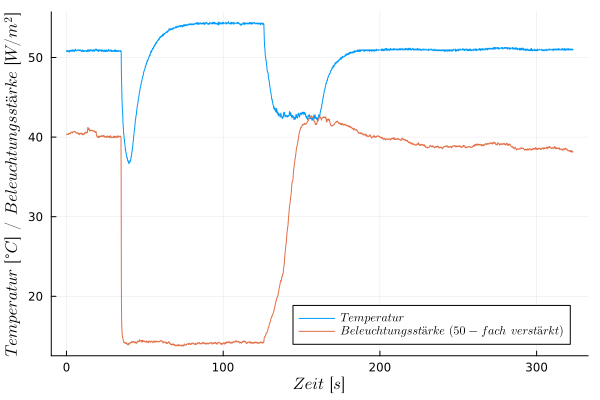

In [10]:
plot(mlsaettigung.seconds, mlsaettigung.temperature, label = L"Temperatur", legend=:bottomright)
plot!(mlsaettigung.seconds, mlsaettigung.beleuchtungsstaerke.*50,
    label = L"Beleuchtungsstärke \enspace (50-fach \enspace verstärkt)")
xaxis!(L"Zeit \enspace [s]")
yaxis!(L"Temperatur \enspace [°C] \enspace / \enspace Beleuchtungsstärke \enspace [W/m^2]")

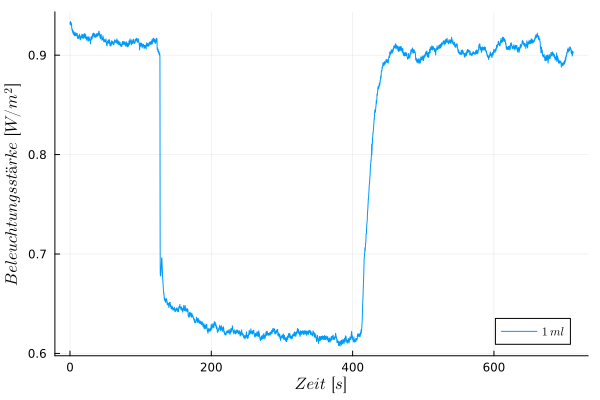

In [11]:
ml1SecondsCut = ml1[1301:end,:seconds] .-130
plot(ml1SecondsCut, ml1.beleuchtungsstaerke[1301:end], label=L"1 \, ml", legend=:bottomright)
xlabel!(L"Zeit \enspace [s]")
ylabel!(L"Beleuchtungsstärke \enspace [W/m^2]")

Lambert-Beer-Gauß-Funktion:

In [12]:
I_0 = 1 # ?
px = 50 # = α_0 * x ?
ν_0 = 0
Δν = 1 # = σ ?
C = 10 # (Testwert) 2. Parameter
I(ν) = I_0 * exp(- px * exp(- 0.5 * ((ν - ν_0)/Δν)^2) * C) # 0.5 steht nicht im Text aber ist in Bild!!!

I (generic function with 1 method)

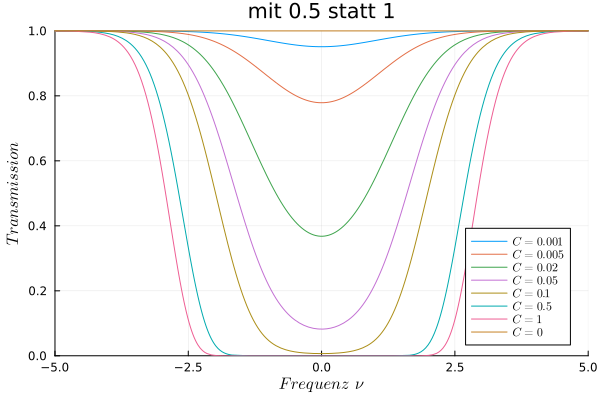

In [13]:
C = 0.001
plot(I, xaxis=[-5,5], yaxis=[0,1], legend=:bottomright, label="\$ C = $C \$", title="mit 0.5 statt 1")
C = 0.005
plot!(I, label="\$ C = $C \$")
C = 0.02
plot!(I, label="\$ C = $C \$")
C = 0.05
plot!(I, label="\$ C = $C \$")
C = 0.1
plot!(I, label="\$ C = $C \$")
C = 0.5
plot!(I, label="\$ C = $C \$")
C = 1
plot!(I, label="\$ C = $C \$")
C = 0
plot!(I, label="\$ C = $C \$")
xlabel!(L"Frequenz \enspace ν")
ylabel!(L"Transmission")

Messwerte:

In [14]:
volumenZelle = 15 * π * (3.93/2)^2 # cm^3 = ml
volumenZelle_err = sqrt( (0.5 * π * (3.93/2)^2)^2 + (15 * π * 3.93/2 * 0.005)^2 )
# Fehler des Zellvolumens = 0

konzentrationen = [0, 1/volumenZelle, 2/volumenZelle, 3/volumenZelle, 4/volumenZelle, 5/volumenZelle, 10/volumenZelle,
    15/volumenZelle, 20/volumenZelle, 30/volumenZelle, 45/volumenZelle, 60/volumenZelle, 1]
# Fehler der C02 Mengen per Spritze: geschätzt auf 0.1 ml
vol_co2_err = 0.1 # ml (geschätzt)
konz_err_gauß(a) = sqrt( (vol_co2_err/volumenZelle)^2 + (a * volumenZelle_err / volumenZelle^2)^2 )
konzentrationen_err = [0, konz_err_gauß(1), konz_err_gauß(2), konz_err_gauß(3), konz_err_gauß(4), konz_err_gauß(5),
    konz_err_gauß(10), konz_err_gauß(15), konz_err_gauß(20), konz_err_gauß(30), konz_err_gauß(45),konz_err_gauß(60), 0]
transmissionswerte = [1, 0.61891/0.91470, 0.54653/0.90009, 0.51851/0.88955, 0.49127/0.88510,
    0.47169/0.88250, 0.42554/0.87689, 0.40244/0.86985, 0.38815/0.86675, 0.36510/0.86045, 0.34723/0.85468,
    0.33312/0.84604, 0.28149/0.80104]
# Fehler per Gaußscher Fehlerfortpflanzung mittels einzelner Fehler aus Mittelwertbildung von CASSY Lab:
trans_err_gauß(a, b, Δa, Δb) = sqrt( (Δa / b)^2 + (a * Δb / b^2)^2 )
transmissionswerte_err = [0, trans_err_gauß(0.61891, 0.91470, 0.00009, 0.00011),
    trans_err_gauß(0.54653, 0.90009, 0.00012, 0.00019), trans_err_gauß(0.51851, 0.88955, 0.00016, 0.00013),
    trans_err_gauß(0.49127, 0.88510, 0.00011, 0.00030), trans_err_gauß(0.47169, 0.88250, 0.00013, 0.00040),
    trans_err_gauß(0.42554, 0.87689, 0.00007, 0.00012), trans_err_gauß(0.40244, 0.86985, 0.00012, 0.00013),
    trans_err_gauß(0.38815, 0.86675, 0.00008, 0.00017), trans_err_gauß(0.36510, 0.86045, 0.00011, 0.00012),
    trans_err_gauß(0.34723, 0.85468, 0.00010, 0.00016), trans_err_gauß(0.33312, 0.84604, 0.00008, 0.00014),
    trans_err_gauß(0.28149, 0.80104, 0.00014, 0.00012)]
;

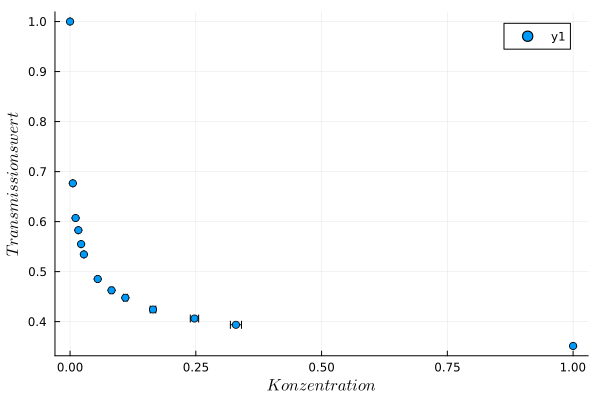

In [15]:
# Plot
scatter(konzentrationen, transmissionswerte, xerr = konzentrationen_err, yerr = transmissionswerte_err)
xlabel!(L"Konzentration")
ylabel!(L"Transmissionswert")

Integralannäherung:
- Idee: Schrittweite * Summer über alle Funktionswerte
- $\nu_1$ = -10, $\nu_2$ = 10

In [16]:
function t_rel(px_given)
    I_0 = 1 # ?
    px = px_given
    ν_0 = 0
    Δν = 1 # = σ ?
    C = 10 # (Testwert) 2. Parameter
    I_t(ν) = I_0 * exp(- px * exp(- 1 * ((ν - ν_0)/Δν)^2) * C) # statt 1 ist 0.5 für die Form im Bild verwendet worden!
    
    ν_1 = -10
    ν_2 = 10
    schrittweite = 0.01

    summen = Array{Float64}(undef, length(konzentrationen))
    for i in 1:length(konzentrationen)
        C = konzentrationen[i]
        for j in ν_1:schrittweite:ν_2
            summen[i] += I_t(j)
        end
    end
    integrale = schrittweite .* summen

    T_rel = (integrale .- integrale[length(konzentrationen)]) ./ (integrale[1] - integrale[length(konzentrationen)])
    offset = transmissionswerte[length(konzentrationen)]
    faktor = 1-offset
    T_rel_skaliert = faktor .* T_rel .+ offset
    # integrale[length(konzentrationen)] = T(100%)
    # integrale[1] = T(0%)
    return integrale, T_rel, T_rel_skaliert
end

t_rel (generic function with 1 method)

Plot beide zusammen:

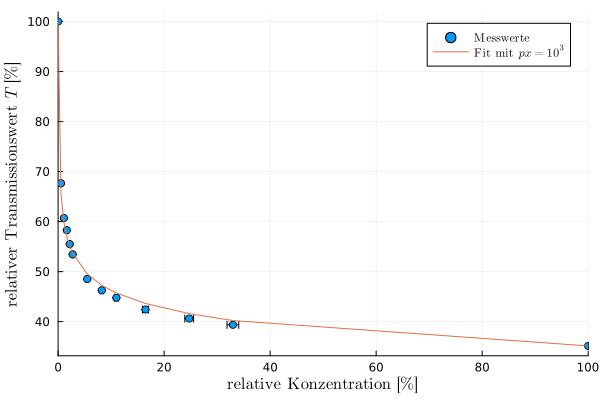

In [17]:
# Plot
tkFit = scatter(konzentrationen.*100, transmissionswerte.*100, label=L"\mathrm{Messwerte}", xaxis=[0,100],
    xerr = konzentrationen_err.*100, yerr = transmissionswerte_err.*100)
i = 1000
plot!(konzentrationen.*100, t_rel(i)[3].*100, label=L"\mathrm{Fit} \enspace \mathrm{mit} \enspace px = 10^3", markeralpha=0.5)
    #, markershape=:diamond)
xlabel!(L"\mathrm{relative \enspace Konzentration} \enspace [\%]")
ylabel!(L"\mathrm{relativer \enspace Transmissionswert} \enspace T \enspace [\%]")

In [18]:
savefig(tkFit, "../../media/B1.1/tkFit.pdf");

Vergleich verschiedener Fitparameter px:

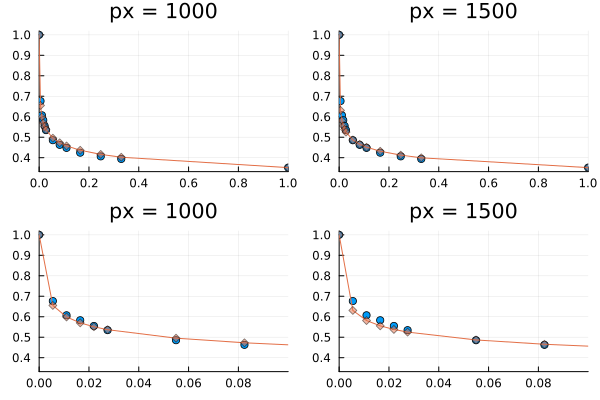

In [19]:
i = 1000
p1 = scatter(konzentrationen, transmissionswerte, label="Messwerte", xaxis=[0,1], title = "px = $i")
plot!(konzentrationen, t_rel(i)[3], label="px = $i, changed", markershape=:diamond, markeralpha=0.5)

i = 1500
p2 = scatter(konzentrationen, transmissionswerte, label="Messwerte", xaxis=[0,1], title = "px = $i")
plot!(konzentrationen, t_rel(i)[3], label="px = $i, changed", markershape=:diamond, markeralpha=0.5)

i = 1000
p3 = scatter(konzentrationen, transmissionswerte, label="Messwerte", xaxis=[0,0.1], title = "px = $i")
plot!(konzentrationen, t_rel(i)[3], label="px = $i, changed", markershape=:diamond, markeralpha=0.5)

i = 1500
p4 = scatter(konzentrationen, transmissionswerte, label="Messwerte", xaxis=[0,0.1], title = "px = $i")
plot!(konzentrationen, t_rel(i)[3], label="px = $i, changed", markershape=:diamond, markeralpha=0.5)

plot(p1, p2, p3, p4, layout=(2,2), legend=false)

##### Minimale Konzentration mit Unsicherheit <= 10% (Frage 2):

In [20]:
I_0 = [0.91470, 0.91470, 0.90009, 0.88955, 0.88510, 0.88250, 0.87689, 0.86985, 0.86675, 0.86045, 0.85468, 0.84604,
    0.80104]
ungenauigkeit = Array{Float64}(undef,length(I_0)-2)
for i in 2:length(I_0)-1 # Start bei 2 weil der erste keine richtige messung war
    ungenauigkeit[i-1] = mittelwert([I_0[i], I_0[i+1]])[2]
end
ΔI_therm = mittelwert(ungenauigkeit)[1]
I_0_mittel = mittelwert(I_0)[1]
T_min = 1 - 10 * ΔI_therm / I_0_mittel

0.9408900567376727

In [21]:
K_min = 350 # ppm
K_min_err = 50 # ppm

50

2. Versuch zum Fitten (Diesmal mit mehr Werten von C):

In [22]:
function t_rel_2(px_given)
    I_0 = 1 # ?
    px = px_given
    ν_0 = 0
    Δν = 1 # = σ ?
    C = 10 # (Testwert) 2. Parameter
    I_t(ν) = I_0 * exp(- px * exp(- 1 * ((ν - ν_0)/Δν)^2) * C) # statt 1 ist 0.5 für die Form im Bild verwendet worden!
    
    ν_1 = -10
    ν_2 = 10
    schrittweite = 0.01
    C_schrittweite = 0.0001 # um zusätzliche "Messwerte" zu erzeugen
    C_schrittweite_2 = 0.02
    firstEnd = 0.02
    C_werte = Array{Float64}(undef, Int(firstEnd/C_schrittweite + (1-firstEnd)/C_schrittweite_2) + 1)
    
    summen = Array{Float64}(undef, Int(firstEnd/C_schrittweite + (1-firstEnd)/C_schrittweite_2) + 1)
    summenIndex = 0
    for c in 0:C_schrittweite:(firstEnd-C_schrittweite)
        C = c
        summenIndex += 1
        C_werte[summenIndex] = c
        for j in ν_1:schrittweite:ν_2
            summen[summenIndex] += I_t(j)
        end
    end
    for c_2 in firstEnd:C_schrittweite_2:1
        C = c_2
        summenIndex += 1
        C_werte[summenIndex] = c_2
        for j in ν_1:schrittweite:ν_2
            summen[summenIndex] += I_t(j)
        end
    end
    integrale = schrittweite .* summen

    T_rel = (integrale .- integrale[length(integrale)]) ./ (integrale[1] - integrale[length(integrale)])
    offset = transmissionswerte[length(konzentrationen)]
    faktor = 1-offset
    T_rel_skaliert = faktor .* T_rel .+ offset
    # integrale[length(konzentrationen)] = T(100%)
    # integrale[1] = T(0%)
    return integrale, T_rel, T_rel_skaliert, summen, C_werte
end

t_rel_2 (generic function with 1 method)

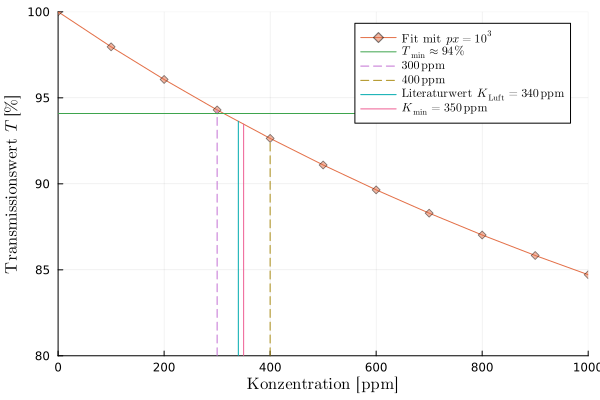

In [23]:
# Plot
 #scatter(konzentrationen, transmissionswerte, label=L"Messwerte", xaxis=[0,0.001], yaxis=[0.8,1],
 #               xerr = konzentrationen_err, yerr = transmissionswerte_err)
i = 1000
t1, t2, y_array, t3, x_array = t_rel_2(i)
fitZoom = plot([1], label="") # Nur um Farben wie oben anzupassen
plot!(x_array.*10^6, y_array.*100, label=L"\mathrm{Fit} \enspace \mathrm{mit} \enspace px = 10^3",
    markeralpha=0.5, markershape=:diamond, xaxis=[0,1000], yaxis=[80,100])
xlabel!(L"\mathrm{Konzentration} \enspace [\mathrm{ppm}]")
ylabel!(L"\mathrm{Transmissionswert} \enspace T \enspace [\%]")

# Literaturwert:
lit = 340 # ppm

# Anliegende Punkte:
x1 = 300
x1_index = 4
x2 = 400
x2_index = 5

# Gerade zwischen erstem und zweitem anliegendem Punkt:
a = (y_array[x2_index] - y_array[x1_index]) / (x2 - x1)
litHeight = (lit - x1) * a + y_array[x1_index]
T_minLength = x1 + (T_min - y_array[x1_index]) / a
K_minHeight = (K_min - x1) * a + y_array[x1_index]

# Resultierende Plots:
plot!([0,2T_minLength], [T_min, T_min].*100, label=L"T_\mathrm{min} \approx 94\,\%") # 2*Länge aus ästetischen Gründen
plot!([300, 300], [0, y_array[4]].*100, linestyle = :dash, label=L"300 \,\mathrm{ppm}")
plot!([400, 400], [0, y_array[5]].*100, linestyle = :dash, label=L"400 \,\mathrm{ppm}")
plot!([lit, lit], [0,litHeight].*100, label=L"\mathrm{Literaturwert} \enspace K_\mathrm{Luft} = 340 \,\mathrm{ppm}")
plot!([K_min, K_min], [0,K_minHeight].*100, label=L"K_\mathrm{min} = 350 \,\mathrm{ppm}")

In [24]:
savefig(fitZoom, "../../media/B1.1/fitZoomPpm.pdf");

### Auswertungsteil 4: Messung der CO2-Konzentration in der Raumluft durch IR-Absorption

In [25]:
saettigungLuft = CSV.read("Konzentrationskalibrierung/Saettigung_Luft.csv", DataFrame);

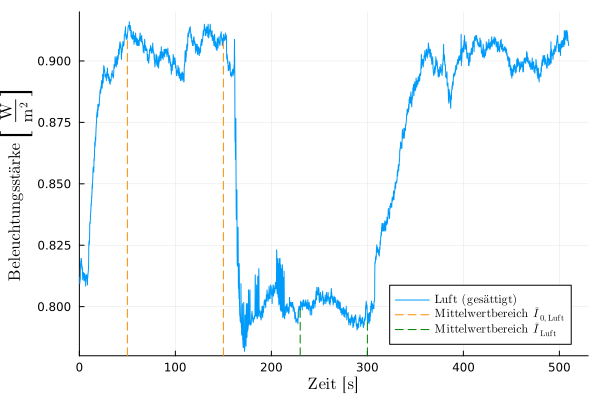

In [26]:
luft = plot(saettigungLuft.seconds, saettigungLuft.beleuchtungsstaerke, label = L"\mathrm{Luft} \enspace (\mathrm{gesättigt})",
    legend=:bottomright, xaxis = [0,530], yaxis = [0.78,0.92])
plot!([50,50], [0.7, saettigungLuft[500, :beleuchtungsstaerke]], linestyle=:dash, linecolor=:darkorange,
    label = L"\mathrm{Mittelwertbereich} \enspace \bar{I}_{0, \mathrm{Luft}}")
plot!([150,150], [0.7, saettigungLuft[1500, :beleuchtungsstaerke]], linestyle=:dash, linecolor=:darkorange, label = "")
plot!([230,230], [0.7, saettigungLuft[2300, :beleuchtungsstaerke]], linestyle=:dash, linecolor=:green,
    label = L"\mathrm{Mittelwertbereich} \enspace \bar{I}_\mathrm{Luft}")
plot!([300,300], [0.7, saettigungLuft[3000, :beleuchtungsstaerke]], linestyle=:dash, linecolor=:green, label = "")
xlabel!(L"\mathrm{Zeit} \enspace [\mathrm{s}]")
ylabel!(L"\mathrm{Beleuchtungsstärke} \enspace \left[\mathrm{\frac{W}{m^2}}\right]")

In [27]:
savefig(luft, "../../media/B1.1/luft.pdf");

In [28]:
I_0_luft = mittelwert(saettigungLuft[500:1500,:beleuchtungsstaerke])

(0.9052179020978987, 0.00017177961799133386)

In [29]:
I_luft = mittelwert(saettigungLuft[2300:3000,:beleuchtungsstaerke])

(0.799490841654779, 0.00014846463455764117)

In [30]:
T_luft = I_luft[1]/I_0_luft[1]

0.8832026408248328

In [31]:
# Gaußsche Fehlerfortfplanzung:
T_luft_err = sqrt( (I_luft[2] / I_0_luft[1])^2 + (I_luft[1] * I_0_luft[2] / I_0_luft[1]^2)^2 )

0.00023449863741111332

In [32]:
t1, t2, trans, t3, conc = t_rel_2(10^3)
df = DataFrame(T=trans, C=conc)
;

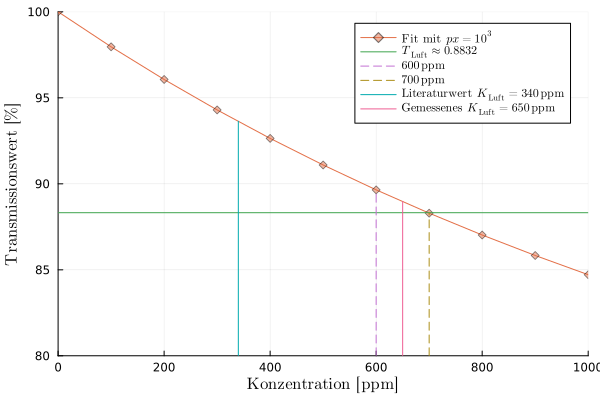

In [33]:
# Plot
 #scatter(konzentrationen, transmissionswerte, label=L"Messwerte", xaxis=[0,0.001], yaxis=[0.8,1],
 #               xerr = konzentrationen_err, yerr = transmissionswerte_err)
i = 1000
t1, t2, y_array, t3, x_array = t_rel_2(i)
luftZoom = plot([1], label="") # Nur um Farben wie oben anzupassen
plot!(x_array.*10^6, y_array.*100, label=L"\mathrm{Fit} \enspace \mathrm{mit} \enspace px = 10^3",
    markeralpha=0.5, markershape=:diamond, xaxis=[0,1000], yaxis=[80,100])
xlabel!(L"\mathrm{Konzentration} \enspace [\mathrm{ppm}]")
ylabel!(L"\mathrm{Transmissionswert} \enspace [\%]")

# Literaturwert:
lit = 340 # ppm

# Anliegende Punkte:
x1 = 600
x1_index = 7
x2 = 700
x2_index = 8

# Gerade zwischen erstem und zweitem anliegendem Punkt:
a_lit = (y_array[5] - y_array[4]) / (400 - 300)
litHeight = (lit - 300) * a_lit + y_array[4]
a = (y_array[x2_index] - y_array[x1_index]) / (x2 - x1)
T_luftLength = x1 + (T_luft - y_array[x1_index]) / a
luftHeight = (650 - x1) * a + y_array[x1_index]

# Resultierende Plots:
plot!([0, 2T_luftLength], [T_luft, T_luft].*100, label=L"T_\mathrm{Luft} \approx 0.8832") # 2*Länge aus ästetischen Gründen
plot!([x1, x1], [0, y_array[x1_index]].*100, linestyle = :dash, label=L"600 \,\mathrm{ppm}")
plot!([x2, x2], [0, y_array[x2_index]].*100, linestyle = :dash, label=L"700 \,\mathrm{ppm}")
plot!([lit, lit], [0,litHeight].*100, label=L"\mathrm{Literaturwert} \enspace K_\mathrm{Luft} = 340 \mathrm{\, ppm}")
plot!([650, 650], [0, luftHeight].*100, label = L"\mathrm{Gemessenes} \enspace K_\mathrm{Luft} = 650 \mathrm{\, ppm}")

In [34]:
savefig(luftZoom, "../../media/B1.1/luftZoomPpm.pdf");

In [35]:
T_luft_ppm = (700 + 600) / 2 # ppm (Literaturwert ~ 420 ppm bzw. 340 ppm)

650.0

In [36]:
T_luft_ppm_err = (700 - 600) / 2 # Da dies genau die halbe Intervalllänge ist

50.0